<a href="https://colab.research.google.com/github/HashBP/Dog_vison-Unsupervised-Learning-Kaggle-Comp.-/blob/main/Dog_vison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzipping the uploaded data from the gDrive
# from zipfile import ZipFile

In [ ]:
# with ZipFile('drive/MyDrive/Dog Vision/archive.zip', 'r') as zipobj:
    # zipobj.extractall('drive/MyDrive/Dog Vision');

# Dog Breed Classification
This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

# Problem
Indentifying the breed of dog given an image of a dog.

# Data
The data we are using if from Kaggle's Dog breed identification competititon.

https://www.kaggle.com/competitions/dog-breed-identification/overview

# Evaluation
The evaluation is a file with probablity of each dog breed with each image given.
Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

# Features
Some information about the data:-
* We're dealing with images(unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dog. This means there are 120 diffrent classes.
* There are around 10,000+ images in training set(These images have labels).
* There are 10,000+ images in test set.(No labels as we have to predict them).


# Workspace



In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ",tf.__version__)
print("TF_hub version: ",hub.__version__)

print("GPU","available YESS!!" if tf.config.list_physical_devices("GPU") else "not available.")

TF version:  2.12.0
TF_hub version:  0.13.0
GPU available YESS!!


In [ ]:
# Turn data/images into tensors or numpy ndarray of matrix.
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

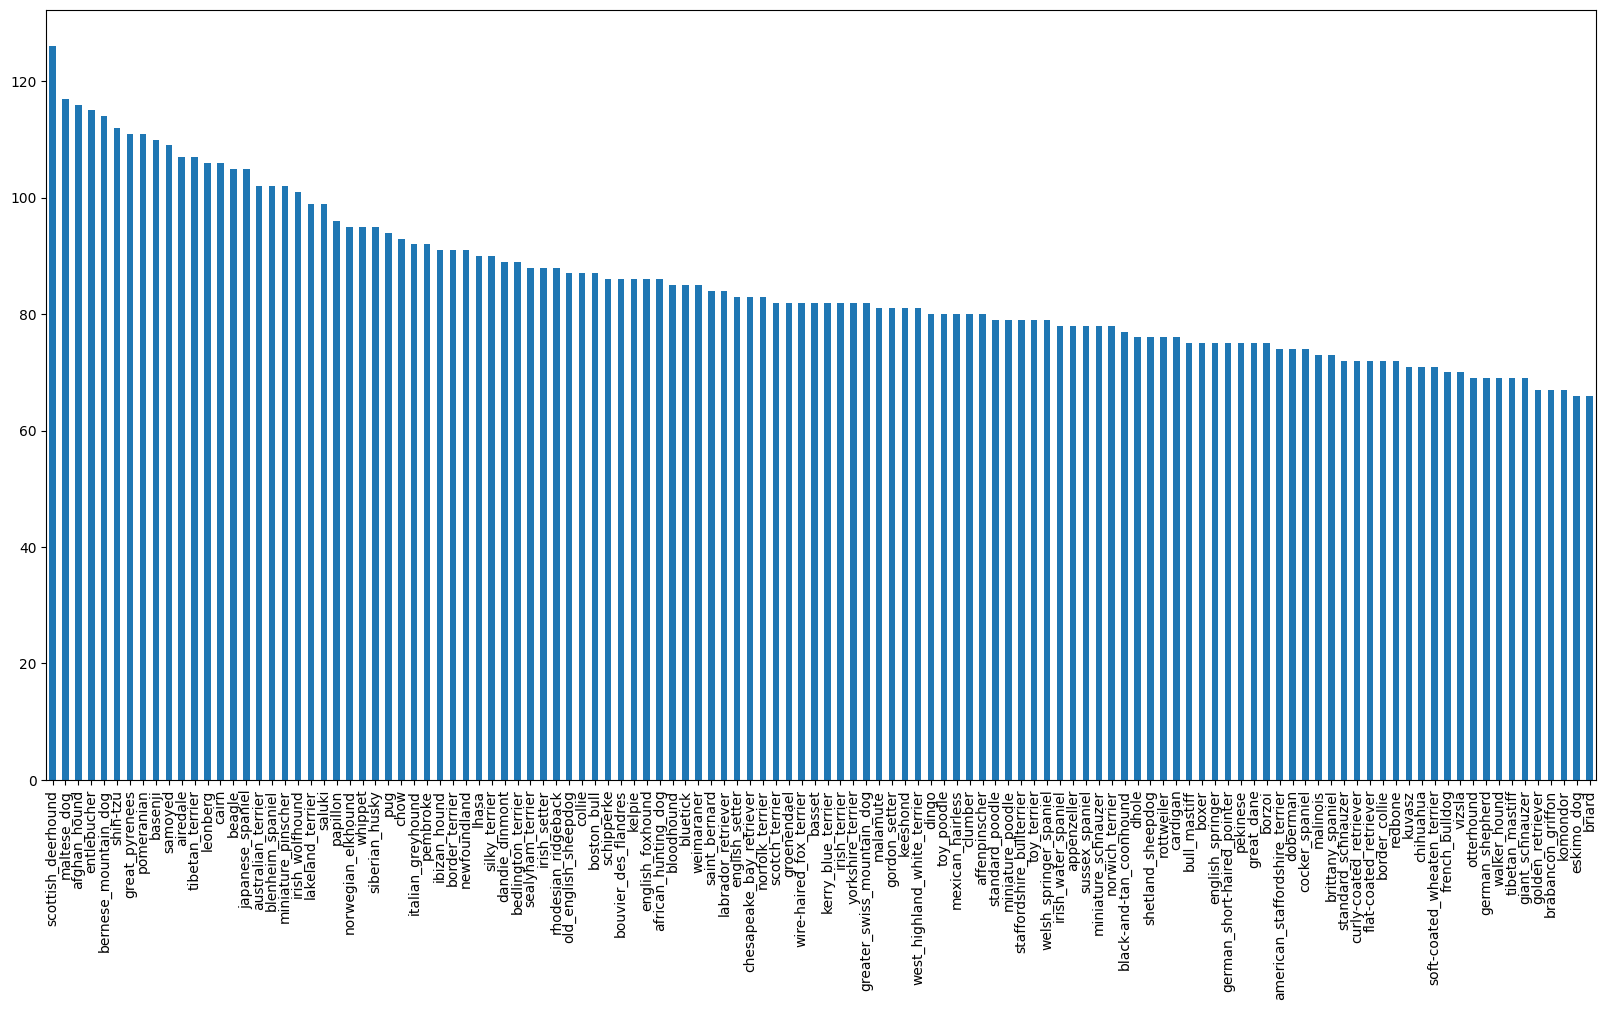

In [ ]:
 labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

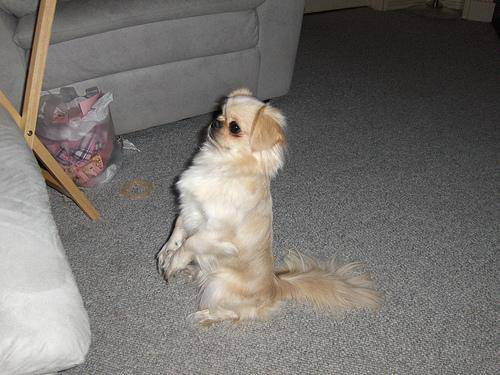

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

### Getting list of all the image file pathnames.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames=["drive/MyDrive/Dog Vision/train/"+fname for fname in labels_csv["id"]+".jpg"]
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(filenames)==len(os.listdir("drive/MyDrive/Dog Vision/train")):
    print("Filenames match actual number of images.")
else:
    print("Filenames dose'nt matches number of images in the directory.")

Filenames match actual number of images.


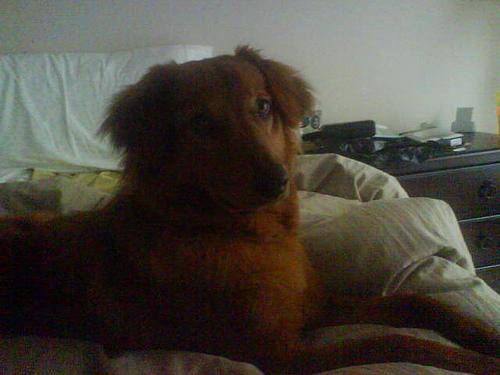

In [ ]:
Image(filenames[1000])

Preparing our labels

In [ ]:
import numpy as np
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
X=filenames
Y=boolean_labels

In [ ]:
len(X)

10222

Experimenting with ~1000 images and increse as needed.

In [ ]:
NUM_IMAGES=1000 #@param {type: "slider", min:1000,max:10222}

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X[:NUM_IMAGES],Y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(800, 800, 200, 200)

In [ ]:
X_train[:5],Y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### PreProcessing Images (Turning Images into Tensors)

To preprocess our Image into Tensors we're going to write a function which does:-
1. Take Image path as Input
2. Use TensorFlow to read the file and save it to a variable `image`.
3. Turn our `image` (a jpg) into Tensors.
4. Normalize our image(convvert color channel values from 0-255 to 0-1)
5. Resize the `image` to be shape of (244,244).
6. Return the modified `Image`.

In [ ]:
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
# image->tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
IMG_SIZE=224

def process_image(image_path,img_size=IMG_SIZE):
    image=tf.io.read_file(image_path)
    image=tf.image.decode_jpeg(image,channels=3)
    image=tf.image.convert_image_dtype(image,tf.float32)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image


## Turning data into batches

In [ ]:
def get_image_label(image_path,label):
    image=process_image(image_path)
    return image,label

In [ ]:
(process_image(X[42]),tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# Define the batch size 32
BATCH_SIZE=32
def create_data_batches(X,Y=None,valid_data=False,test_data=False):
    # If Test Dataset
    if test_data:
        print("Creating test data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch=data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    if valid_data:
        print("Creating validation data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Createing training data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
        data=data.shuffle(buffer_size=len(X))
        data=data.map(get_image_label)
        data_batch=data.batch(BATCH_SIZE)
        return data_batch

In [ ]:
train_data=create_data_batches(X_train,Y_train)
val_data=create_data_batches(X_val,Y_val,valid_data=True)

Createing training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising Data Batches
Our data is now in batches, however lets try to understand these by visualising these batches

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

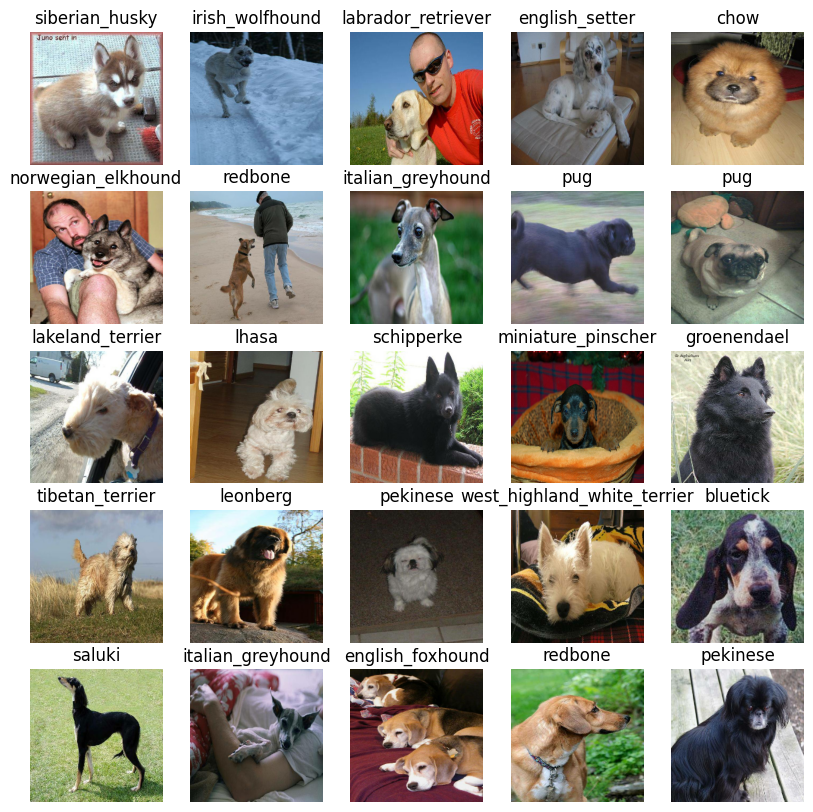

In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

## Building a model
Before we build a model, There are a few things we need to define:
* Input shape to our model
* Output shape of out model
* URL of the model we want to use

In [ ]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] # Batch, height,width,color
OUTPUT_SHAPE=len(unique_breeds)
MODAL_URL = ...

In [ ]:
import os
print(len(os.listdir("drive/MyDrive/Dog Vision/test")))

10357
